# Project: Analyzing Boston Housing Dataset

**Project Scenario**: You are working as a Data Scientist with a housing agency in Boston MA. You have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

- **Question 1**: Is there a significant difference in the median value of houses bounded by the Charles river or not?
- **Question 2**: Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?
- **Question 3**: Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?
- **Question 4**: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

#### About the Dataset

The following describes the data variables:

-      CRIM - per capita crime rate by town

-      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

-      INDUS - proportion of non-retail business acres per town.

-      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

-      NOX - nitric oxides concentration (parts per 10 million)

-      RM - average number of rooms per dwelling

-      AGE - proportion of owner-occupied units built prior to 1940

-      DIS - weighted distances to five Boston employment centres

-      RAD - index of accessibility to radial highways

-      TAX - full-value property-tax rate per $10,000.

-      PTRATIO - pupil-teacher ratio by town

-      LSTAT - % lower status of the population

-      MEDV - Median value of owner-occupied homes in $1000's

In [1]:
# Imported Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns

C:\Users\colli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\colli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
# Load dataset
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [4]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [5]:
boston_df.drop('Unnamed: 0', axis = 1, inplace = True) # Removed the unnamed column

In [6]:
boston_df.shape # 506 rows, 13 columns

(506, 13)

### Question 1

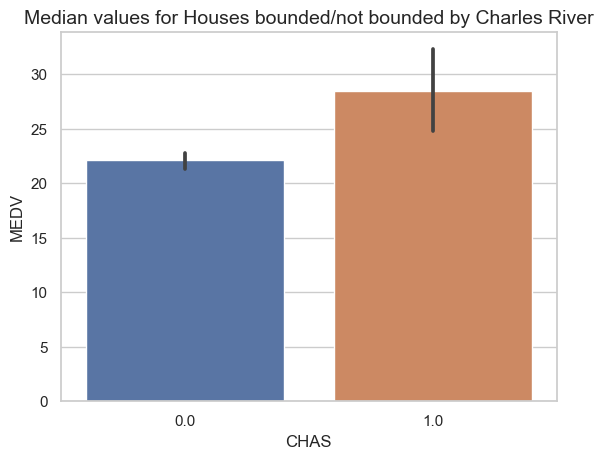

In [7]:
# Create bar plot using Seaborn
sns.set(style="whitegrid")

ax = sns.barplot(x = "CHAS", y = "MEDV", data = boston_df)
plt.title("Median values for Houses bounded/not bounded by Charles River", fontsize = 14)
plt.savefig("MEDV barplot.png")

**Conclusion on plot:** The houses bounded by the Charles River (1.0) had a higher median (median around 28) compared to the houses not bounded by Charles River (0.0 with a median around 21).

#### Hypothesis Testing

1) State the hypothesis

$\mu_1$ = Median values for Houses are bounded by Charles River 
<br> 
$\mu_2$ = Median values for Houses are not bounded by Charles River

$H_0: \mu_1 = \mu_2$ (There is no difference between median values for Houses bounded (or not bounded) by Charles river) <br>
$H_a: \mu_1 \neq \mu_2$ (There is a difference between median values for Houses bounded (or not bounded) by Charles river)

2) P(reject $H_0$ | $H_0$ is not true) = $\alpha$ = 0.05

In [8]:
bounded = boston_df[boston_df['CHAS'] == 1]['MEDV']
non_bounded = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Check for assumption of equal variance
stats.levene(bounded, non_bounded, center = 'mean') 

# Statistic: 8.752
# p-value: 0.0032

LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

Since p-value is less than $\alpha$, we cannot assume equal variance

In [9]:
# T-Test for Independence (unequal variance)
stats.ttest_ind(bounded, non_bounded, equal_var = False)

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

- Test Statistic = 3.113
- p-value = 0.0036

**Conclusion:**
Since p-value is less than $\alpha$, we reject the null hypothesis. There is sufficient evidence that there is a difference between the Median values for Houses 
that are, or are not bounded, by the Charles river

### Question 2

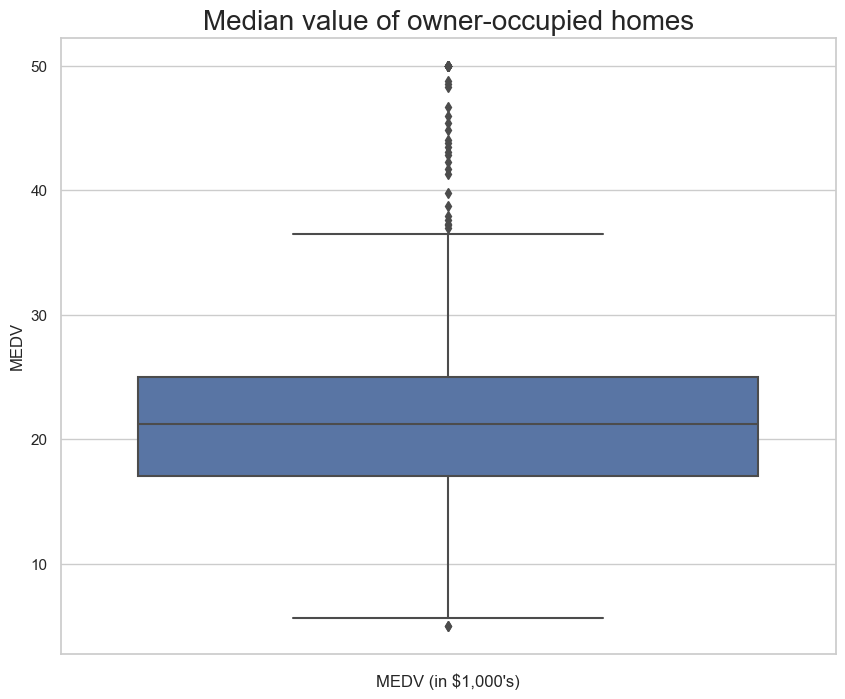

In [10]:
# Create 2 boxplots: One to provied "Median value of owner-occupied homes" and another to compare the MEDV variable vs. AGE variable
fig,ax = plt.subplots(figsize=(10,8))
sns.boxplot(y = "MEDV", data = boston_df)
plt.xlabel("MEDV (in $1,000's)")
plt.title("Median value of owner-occupied homes", fontsize = 20)
plt.savefig("MEDV boxplot.png")

**Explanation about Plot:** The median value of owner-occupied homes (in $1000's) is about 21.

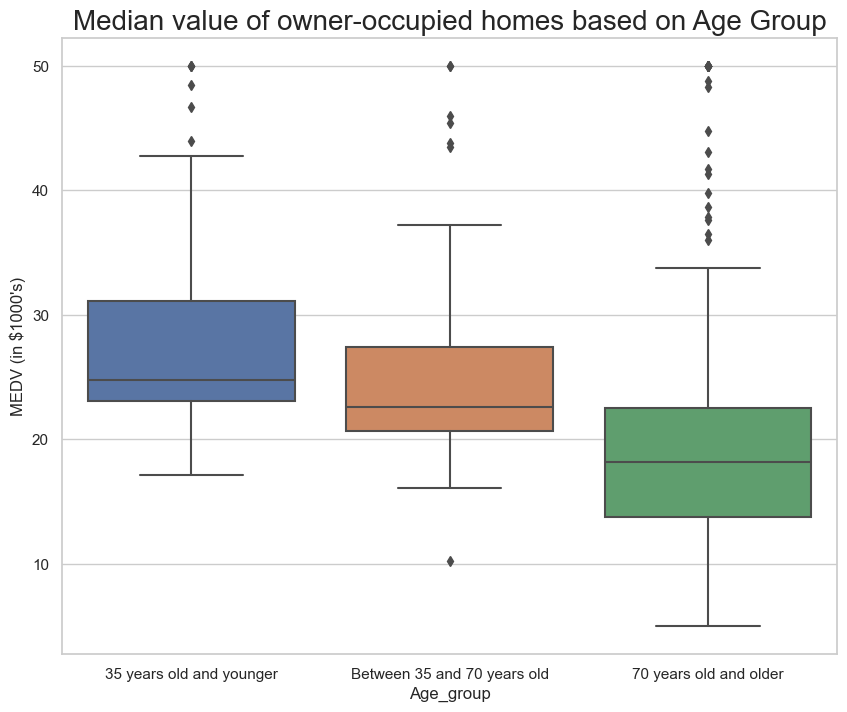

In [11]:
# Age distributions based on MEDV
boston_df.loc[boston_df['AGE'] <= 35.0, 'Age_group'] = "35 years old and younger"
boston_df.loc[(boston_df['AGE'] > 35.0) & (boston_df['AGE'] < 70.0), 'Age_group'] = "Between 35 and 70 years old"
boston_df.loc[boston_df['AGE'] >= 70.0, 'Age_group'] = "70 years old and older"

#Boxplot comparing MEDV and AGE
fig,ax = plt.subplots(figsize=(10,8))
ax = sns.boxplot(x = "Age_group", y = "MEDV", data = boston_df, 
                 order = ["35 years old and younger", "Between 35 and 70 years old", "70 years old and older"])
plt.title("Median value of owner-occupied homes based on Age Group", fontsize = 20)
plt.ylabel("MEDV (in $1000's)")
plt.savefig("MEDV based on age_group.png")

**Conclusion on Boxplots:** The age_group of 70 years and older had the lowest median of around $\$$18,000 dollars of owner-occupied homes. The age_group of 35 years and younger had the highest median of around $\$$25,000 dollars of owner-occupied homes. 

#### Hypothesis Testing

1) State the hypothesis

$\mu_1$ = Age group younger than 35 years old
<br> 
$\mu_2$ = Age group between 35 and 70 years old
<br>
$\mu_3$ = Age group older than 70 years old


$H_0: \mu_1 = \mu_2 = \mu_3$ (There is no difference between the age groups) <br>
$H_a: \mu_1 \neq \mu_2 \neq \mu_3$ (There is a difference between the age groups)

2) P(reject $H_0$ | $H_0$ is not true) = $\alpha$ = 0.05

In [12]:
# Perform ANOVA to compare AGE and MEDV (use Levene test first)
thirtyfive_lower_medv = boston_df[boston_df['Age_group'] == '35 years old and younger']['MEDV']
thirtyfive_seventy_medv = boston_df[boston_df['Age_group'] == 'Between 35 and 70 years old']['MEDV']
seventy_older_medv = boston_df[boston_df['Age_group'] == '70 years old and older']['MEDV']

stats.levene(thirtyfive_lower_medv, thirtyfive_seventy_medv, seventy_older_medv, center = 'mean')

LeveneResult(statistic=2.780620029374844, pvalue=0.06295337343259205)

Since p_value is greater than alpha, we can assume equal variance between the age groups based on the MEDV variable

In [13]:
# ANOVA
f_statistic, p_value = stats.f_oneway(thirtyfive_lower_medv, thirtyfive_seventy_medv, seventy_older_medv)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


- Test Statistic: 36.408
- p-value: 1.711e-15

**Conclusion:** Since p-value is less than $\alpha$, we reject the null hypothesis. There is sufficient evidence that there is a difference between the Median values for owner-occupied homes based on the different age groups.

### Question 3

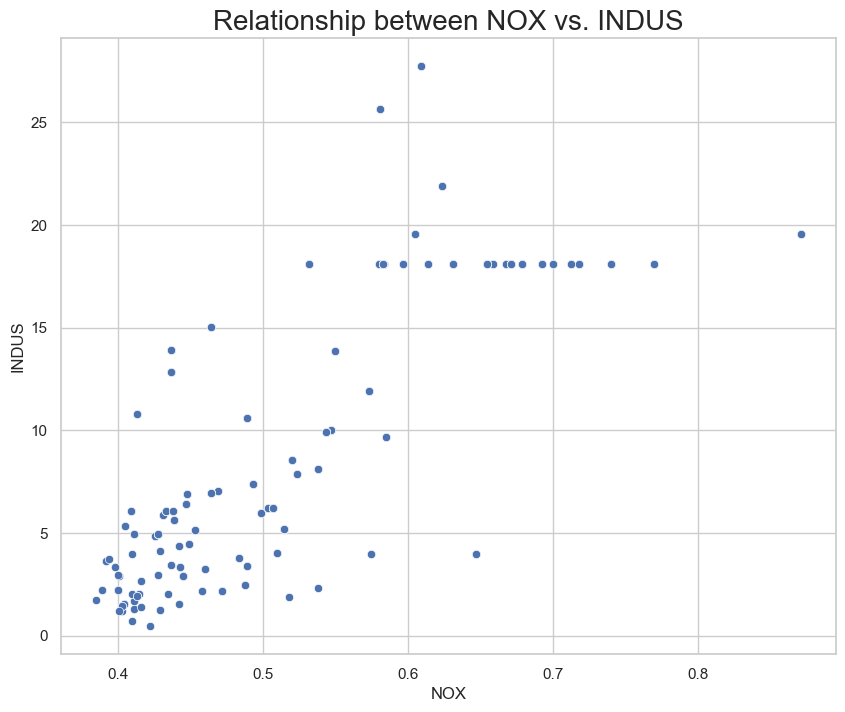

In [14]:
# Create scatterplot to show the correlation between NOX and INDUS
fig,ax = plt.subplots(figsize=(10,8))
ax = sns.scatterplot(x = "NOX", y = "INDUS", data = boston_df)
plt.title("Relationship between NOX vs. INDUS", fontsize = 20)
plt.savefig("NOX vs INDUS.png")

**Explanation:** The scatter plot above shows a positive correlation between the variable NOX and INDUS

#### Hypothesis Test

1) State the hypothesis

$H_0: \rho = 0$ (There is no relationship between NOX and INDUS) 
<br>
$H_a: \rho \neq 0$ (There is a relationship between NOX and INDUS)

**NOTE:** $\rho$ is the population correlation coefficient that is being estimated by the sample correlation coefficient
r.

2) P(reject $H_0$ | $H_0$ is not true) = $\alpha$ = 0.05

In [15]:
# Calculate Pearson correlation coefficient between NOX and INDUS
stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209149, 7.913361061240043e-98)

- Test Statisitc: r = 0.76
- p-value: 7.91e-98

**Conclusion:** Since p-value is less-than $\alpha$, we reject the null hypothesis.There is suffciient evidence to conclude that there's a linear relationship between Nitric Oxide concentrations (NOX) and the proportion of non-retail business acres per town(INDUS).

### Question 4

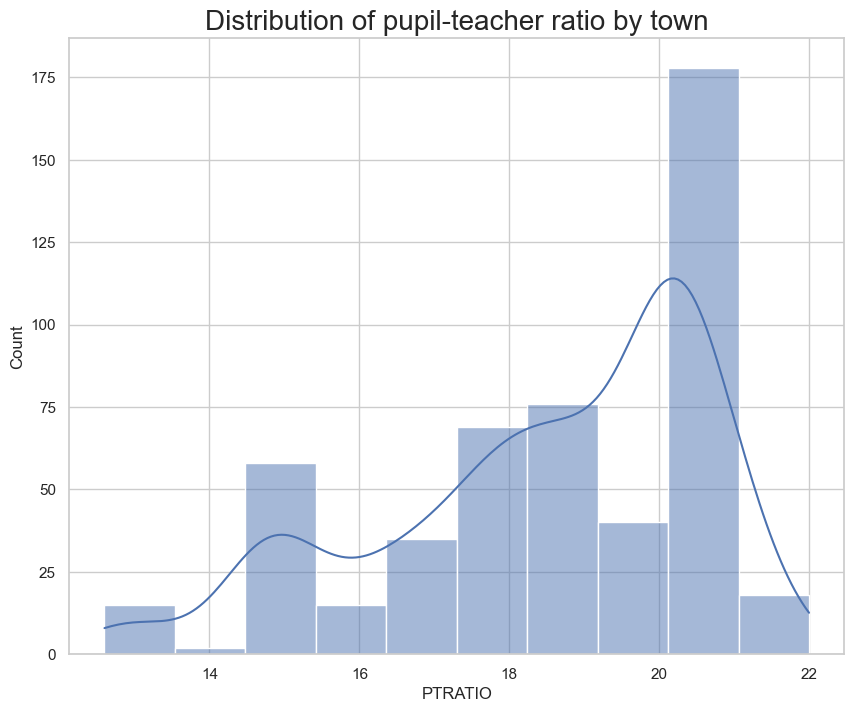

In [16]:
# Generate histogram for pupil-to-teacher ratio (PTRATIO) variable
fig,ax = plt.subplots(figsize=(10,8))
ax = sns.histplot(x = "PTRATIO", data = boston_df, bins = 10, kde = True)
plt.title("Distribution of pupil-teacher ratio by town", fontsize = 20)
plt.savefig("PTRATIO histogram.png")

**Explanation about Historam:** The histogram showing the distribution of the pupil-teacher ratio by town is a left-skewed distribution, where most of the PTRATIO values are around 21.

#### Hypothesis Testing

1) State the hypothesis<br>

$\beta_1$ = The average change in MEDV per unit increase in DIS

$H_0: \beta_1 = 0$ (There is no statisitcally significant relationship between DIS and MEDV) 
<br>
$H_a: \beta_1 \neq 0$ (There is a statisitcally significant relationship between DIS and MEDV)

2) P(reject $H_0$ | $H_0$ is not true) = $\alpha$ = 0.05

In [17]:
# Perform linear regression between DIS and MEDV
X = boston_df["DIS"]
y = boston_df["MEDV"]

# add an intercept (beta_0) to the model
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

C:\Users\colli\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           1.21e-08
Time:                        08:54:20   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** Since the p-value is less than $\alpha\$, we reject the null hypothesis. There is evidence that there is a statistically significant relationship between the variables DIS and MEDV.